In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline

import seaborn as sns
sns.set()
sns.set_context('paper', font_scale=1.5)
sns.set_style("whitegrid")

In [31]:
mpl.rcParams['figure.figsize'] = [10, 7]
mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 12

mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.3

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.family'] = 'DeJavu Serif'

In [32]:
BPATH = "/home/dan/edu/uni/diplomka/tex/Images/charted/"

In [350]:
from kfsims.trajectory import trajectory
trj = trajectory(SEED, 1000)
true_traj = trj.X.T
cov_traj = trj.R

In [351]:
np.random.seed(10)
n_static = noise.static_noise(1000, mod=3)

cov_init = abs(cov_traj) # np.cov(n_static.T)
msrms = trj.Y + n_static.T

Just an idea - it seems that at the beginning, before it catches itself, it does some stupid move up and down and then it can stay in the local minimum. Maybe if we tried to solve this some how would be an interesting thing.

In [352]:
res_dv, rms_dv, std_dv, nd = daniels_variant(msrms, true_traj, cov_init, rho=0.95, debug=True)

In [353]:
rgr = [np.linalg.norm(mat - cov_init) for mat in nd.logger['R']]

In [355]:
nd.logger['R'][-1]

array([[2.66599664, 0.79276921],
       [0.79276921, 3.23995648]])

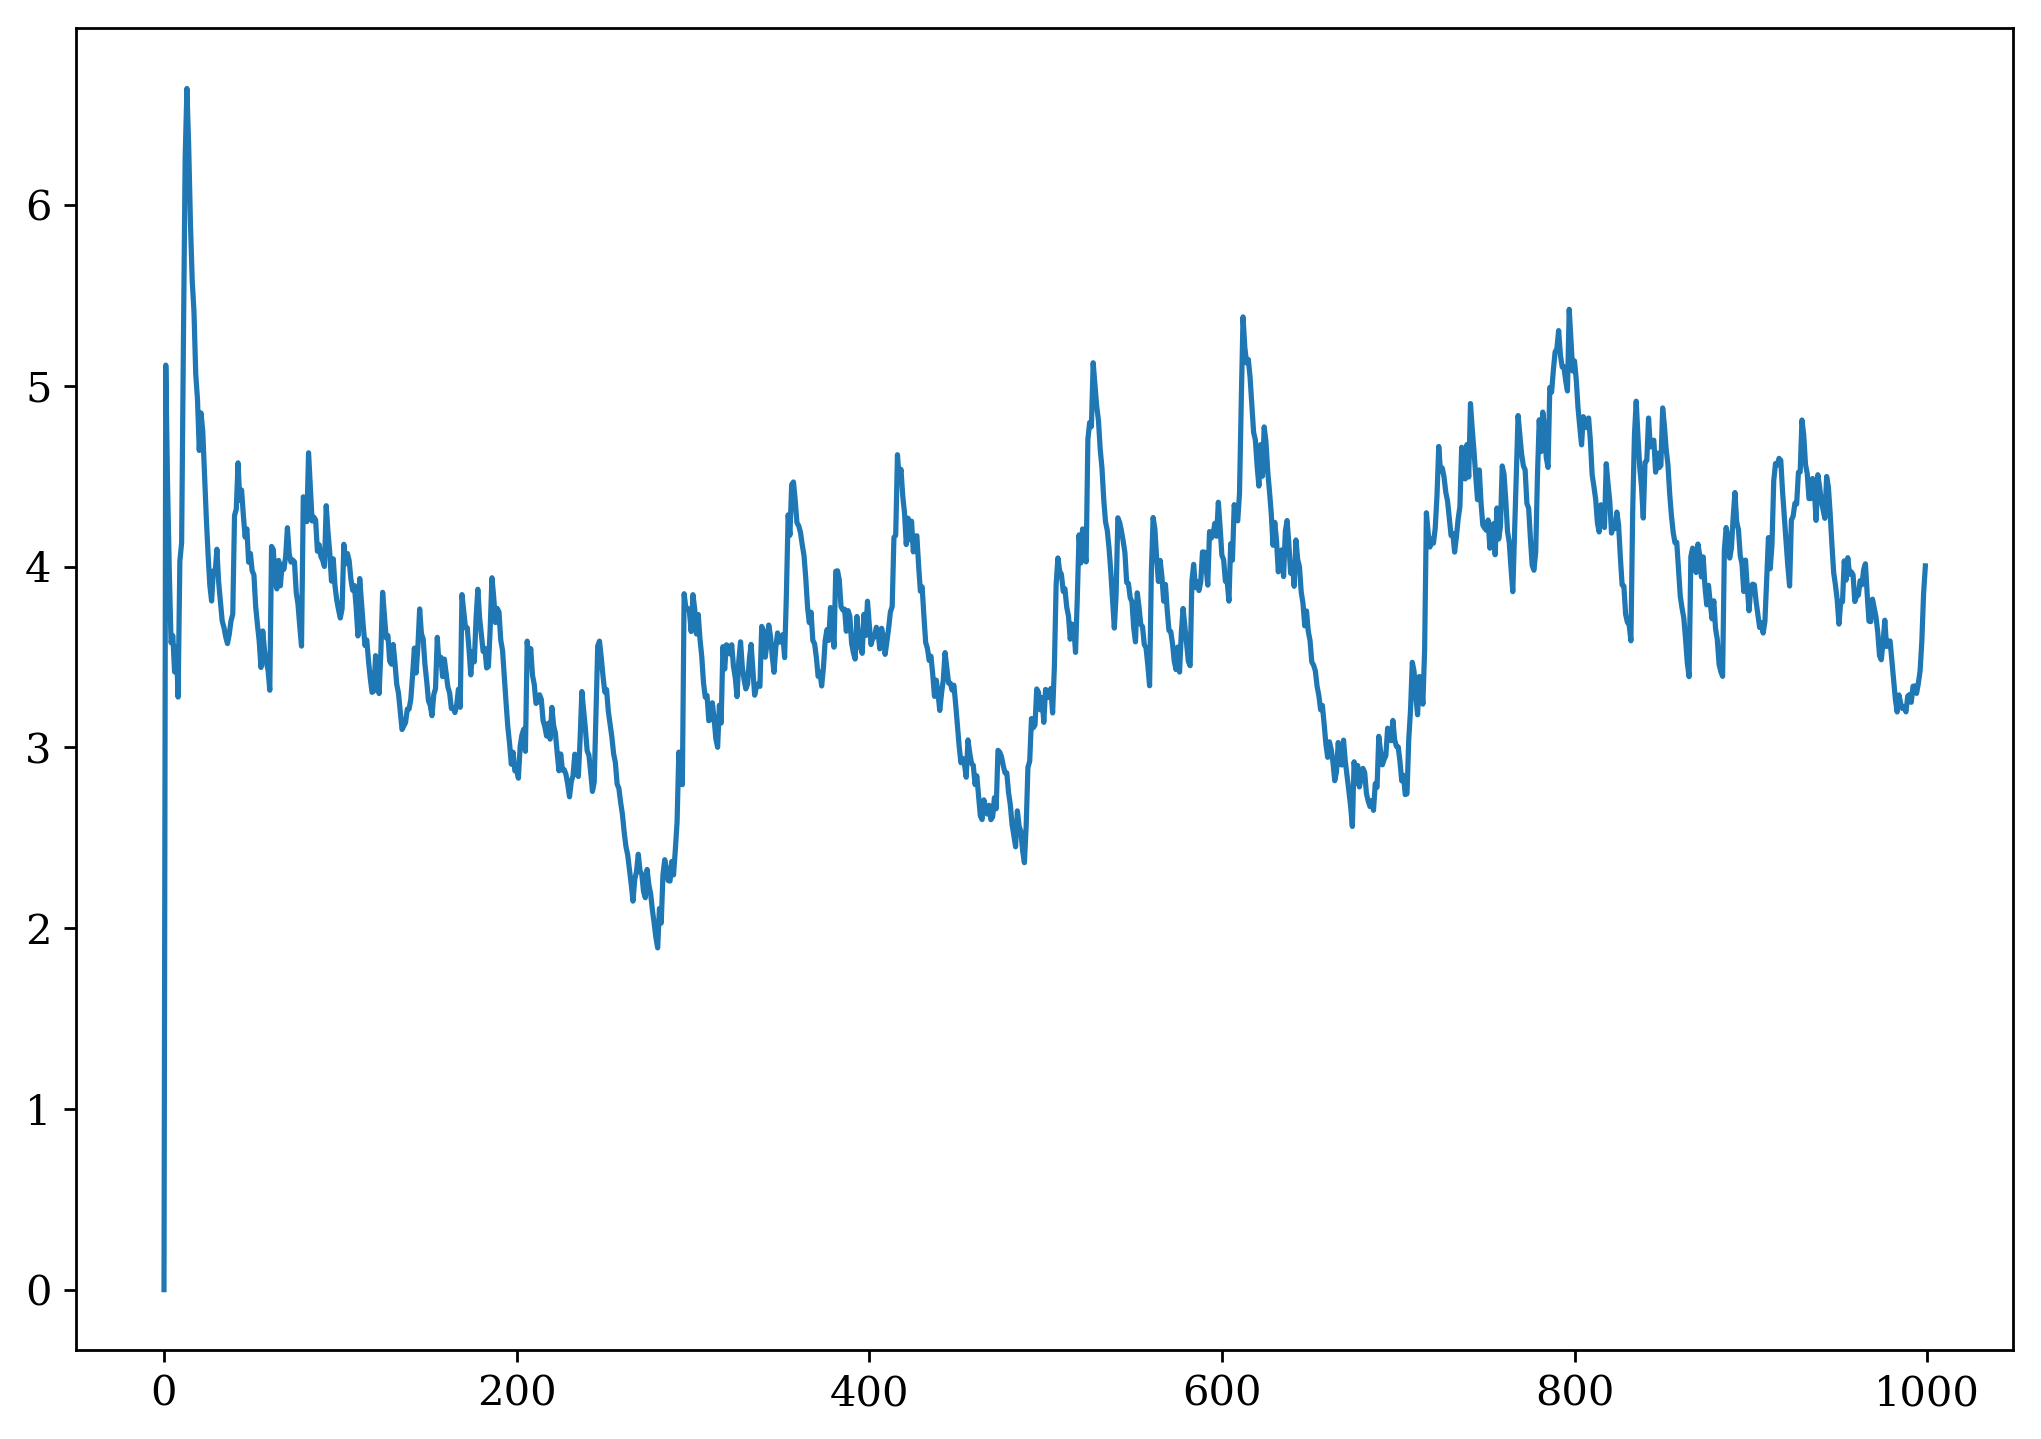

In [356]:
plt.plot(rgr)